In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import pandas as pd
%matplotlib inline
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
#cv2.__version__

'4.7.0'

In [2]:
#Load licence plate yolo trained trained model
model_license=torch.hub.load('ultralytics/yolov5','custom','./models/best.pt')

In [1]:
#Load the model to detatect the charter (Here using trained yolo,you can use OCRs)
model_ocr=torch.hub.load('ultralytics/yolov5','custom','./models/ocr_best.pt')
model_ocr.conf=0.6

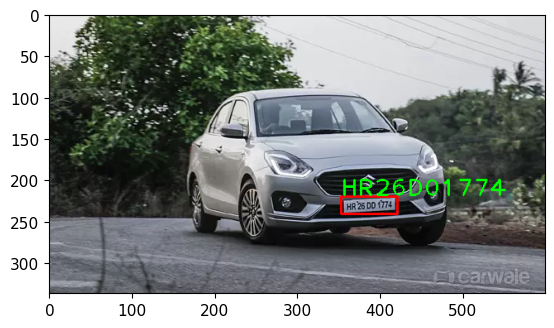

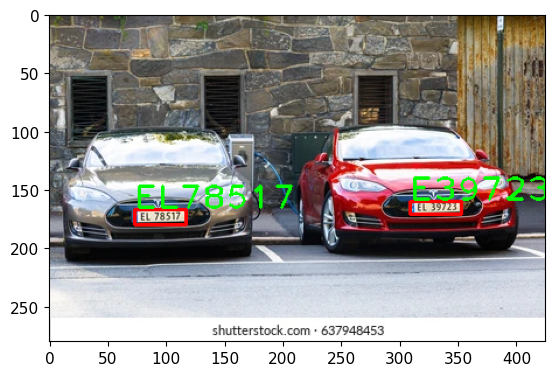

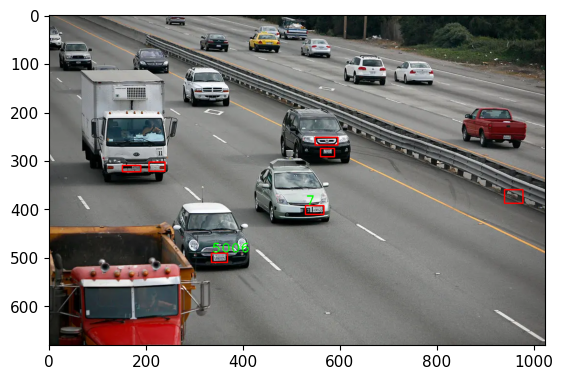

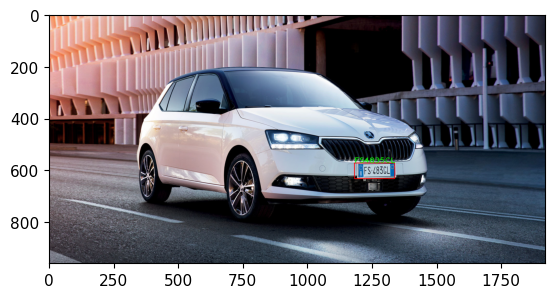

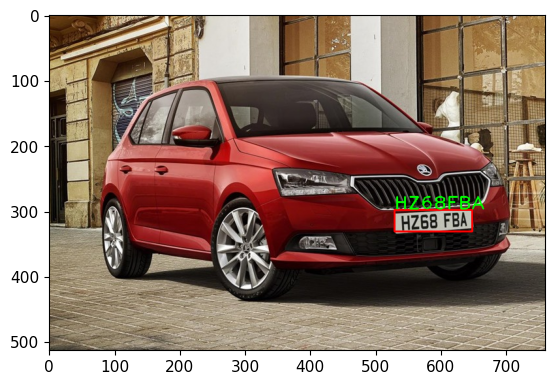

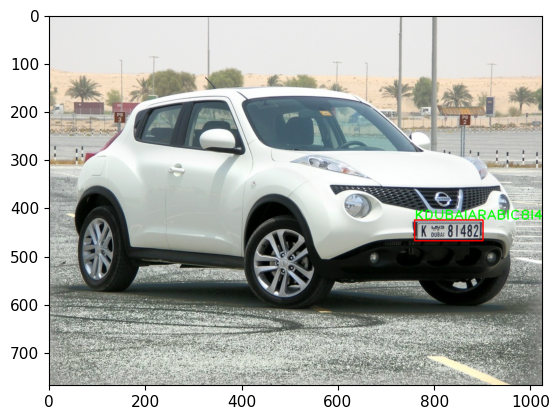

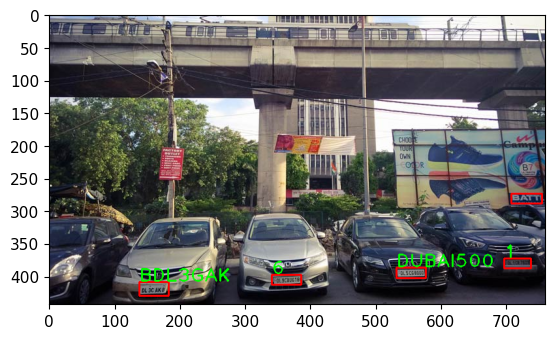

In [6]:

%matplotlib inline


test_dire='./images/'
file_name=os.listdir(test_dire)
res=[]

for i in range(len(file_name)):
    img=cv2.imread(test_dire+file_name[i]) 
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img1=img.copy()
    res_license=model_license(img)
    
    xyxy=res_license.pandas().xyxy[0]  #license #this will results in Dataframe format good  for display
    
    xyxy1=res_license.xyxy[0].cpu().detach().numpy() #this will results in numpy format
    xyxy1=xyxy1.astype('int')  #converting it to int as obj position should be in int.If 145 then 146 pixel,it cant be in between that.
    for j in range(len(xyxy)):
        plate=img1[int(xyxy['ymin'][j]):int(xyxy['ymax'][j]),int(xyxy['xmin'][j]):int(xyxy['xmax'][j])]
        res_ocr=model_ocr(plate)
       # print(res_ocr)
        char=res_ocr.pandas().xyxy[0]
        label_yolo=char.sort_values('xmin')
        label=''.join(list(label_yolo['name']))  #license number.converting list to a string.
        #print('YOLO model result: ',label)
        
        font = cv2.FONT_HERSHEY_PLAIN      
        color=(0,0,255)
        cv2.rectangle(img1, (xyxy1[j,0], xyxy1[j,1]), (xyxy1[j,2], xyxy1[j,3]), (255,0,0), 2) #xyxy1 from numpy 2 for thickness
        cv2.putText(img1,label , (xyxy1[j,0], xyxy1[j,1]), font,2,(0,255,0), thickness=2)
        
        res.append([file_name[i],label])
        
    plt.imshow(img1)
    plt.show()
    
pd.DataFrame(res).to_csv('results_license1.csv')
    

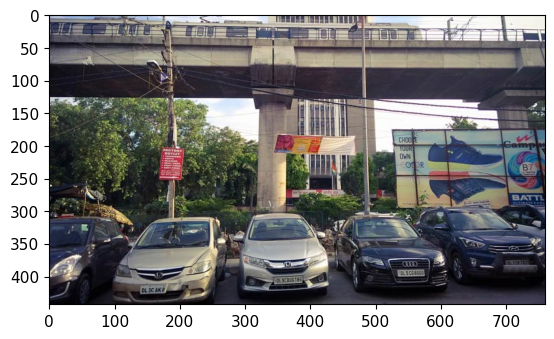

In [18]:
plt.imshow(img)

In [7]:
count=0

cap=cv2.VideoCapture('./Videos/traffic.mp4')

while True: #infinite loop
    # Load Image
    ret, img = cap.read() #capture the image from video ,ret is boolean value.If ret is false when break it and come out.ret true means picture is ok.
    #print("No of frame=",cap.get(cv2.CAP_PROP_POS_FRAMES))
    if ret is False:
        break
    count += 2 # i.e. at 30 fps, this advances one second(for count+=30 ,only one image will be captured per sec)
    
    #print(count)
    cap.set(cv2.CAP_PROP_POS_FRAMES, count) 
    #count +=1 .it will capture 30 fps 
    #these (count and cap.set) lines are good to give as it controls how many frames/images to read from the video
    #If nothing given then generally it will capture 30 fps so In one sec it can read only 1 frame and leave 29 frame .In next sec it will read 31st frame. 
    #cap.set(cv2.CAP_PROP_POS_FRAMES, count) : set to which frame to read 
    cv2.imshow('img',img)
    key = cv2.waitKey(1) #1 means wait for 1 millisecond
    if key == 27:
        break
cv2.destroyAllWindows()

In [9]:

#res=[]
count=0
#VideoCapture for displaying videos.
#cap=cv2.VideoCapture(0) #for webcam feed.Can give location of cctv live server location also
cap=cv2.VideoCapture('./Videos/traffic.mp4')
while True:
    ret, img = cap.read()
    if ret is False:
        break
    count += 4 # i.e. at 30 fps, this advances one second
    cap.set(cv2.CAP_PROP_POS_FRAMES, count)
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ######################################  COPIED #################################################
    img1=img.copy()
    res_license=model_license(img)

    xyxy=res_license.pandas().xyxy[0]

    xyxy1=res_license.xyxy[0].cpu().detach().numpy()
    xyxy1=xyxy1.astype('int')
    for j in range(len(xyxy)):
        plate=img1[int(xyxy['ymin'][j]):int(xyxy['ymax'][j]),int(xyxy['xmin'][j]):int(xyxy['xmax'][j])]
        res_ocr=model_ocr(plate)
        #print(res_ocr)
        char=res_ocr.pandas().xyxy[0]
        label_yolo=char.sort_values('xmin')
        label=''.join(list(label_yolo['name']))
        #print('YOLO model result: ',label)
        #res.append([file_name[i],label])

        font = cv2.FONT_HERSHEY_PLAIN      
        color=(0,0,255)
        cv2.rectangle(img1, (xyxy1[j,0], xyxy1[j,1]), (xyxy1[j,2], xyxy1[j,3]), (255,0,0), 2)
        cv2.putText(img1,label , (xyxy1[j,0], xyxy1[j,1]), font,2,(0,255,0), thickness=2)
        
        ######################################  COPIED #################################################

    cv2.imshow('img',img1)
    key = cv2.waitKey(1)
    if key == 27:
        break   
cv2.destroyAllWindows()

In [13]:

#res=[]
count=0
reg_int = np.array([[200, 350], [1250, 350], [1250, 675], [200, 675]]) # defining the bounding box
cap=cv2.VideoCapture('./Videos/traffic.mp4')
while True:
    ret, img = cap.read()
    if ret is False:
        break
    count += 1 # i.e. at 30 fps, this advances one second
    cap.set(cv2.CAP_PROP_POS_FRAMES, count)
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ######################################  COPIED #################################################
    img1=img.copy()
    cv2.polylines(img1, [reg_int], True, (0, 255, 255), 3)  #new lines for drawing rectangle
    res_license=model_license(img)

    xyxy=res_license.pandas().xyxy[0]

    xyxy1=res_license.xyxy[0].cpu().detach().numpy()
    xyxy1=xyxy1.astype('int')
    for j in range(len(xyxy)):
        if (xyxy1[j,3]>450) & (xyxy1[j,3]<650): # number plate detected between 350 and 650 y-region
            plate=img1[int(xyxy['ymin'][j]):int(xyxy['ymax'][j]),int(xyxy['xmin'][j]):int(xyxy['xmax'][j])]
            res_ocr=model_ocr(plate)
            #print(res_ocr)
            char=res_ocr.pandas().xyxy[0]
            label_yolo=char.sort_values('xmin')
            label=''.join(list(label_yolo['name']))
            #print('YOLO model result: ',label)
            #res.append([file_name[i],label])

            font = cv2.FONT_HERSHEY_PLAIN      
            color=(0,0,255)
            cv2.rectangle(img1, (xyxy1[j,0], xyxy1[j,1]), (xyxy1[j,2], xyxy1[j,3]), (255,0,0), 2)
            cv2.putText(img1,label , (xyxy1[j,0], xyxy1[j,1]), font,2,(0,255,0), thickness=2)
            
        ######################################  COPIED #################################################
    cv2.imshow('img',img1)
    key = cv2.waitKey(1)
    if key == 27:
        break   
cv2.destroyAllWindows()